# GRIP: The Sparks Foundation

## Data Science and Business Analytics Internship

### Intern Name: Ishaun Sinha

### Prediction using Unsupervised Machine Learning

#### Task: From the given dataset, predict the optimum number of clusters and represent it virtually 

### Importing required libraries


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sb
%matplotlib inline


### Importing the given dataset

In [42]:
df= pd.read_csv('Iris.csv')

### Exploring the dataset

In [43]:
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [44]:
df.tail(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
140,141,6.7,3.1,5.6,2.4,Iris-virginica
141,142,6.9,3.1,5.1,2.3,Iris-virginica
142,143,5.8,2.7,5.1,1.9,Iris-virginica
143,144,6.8,3.2,5.9,2.3,Iris-virginica
144,145,6.7,3.3,5.7,2.5,Iris-virginica
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [45]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [48]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

### Dropping unnecessary columns from the dataset

In [49]:
iris= df.drop(['Id','Species'],axis=1)
iris.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


### Outliers checking

<AxesSubplot:xlabel='SepalLengthCm'>

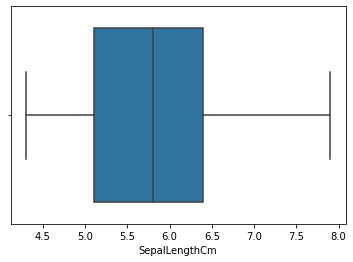

In [50]:
sb.boxplot(x=iris['SepalLengthCm'])

<AxesSubplot:xlabel='SepalWidthCm'>

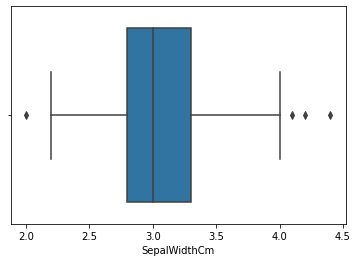

In [51]:
sb.boxplot(x=iris['SepalWidthCm'])

### Removing the Outliers

In [54]:
for i in ['SepalWidthCm']:
    q3,q1= np.percentile(iris.loc[:,i],[75,25])
    iqr= q3-q1
    
    max= q3+(1.5*iqr)
    min= q1- (1.5*iqr)
    iris.loc[iris[i]<min,i]=np.NaN
    iris.loc[iris[i]>max,i]= np.NaN

<AxesSubplot:xlabel='SepalWidthCm'>

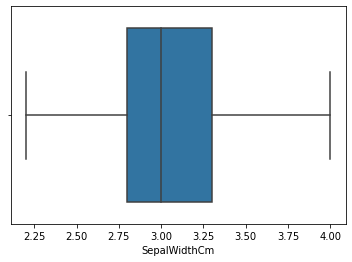

In [55]:
sb.boxplot(x=iris['SepalWidthCm'])

### Finding Correlation among attributes

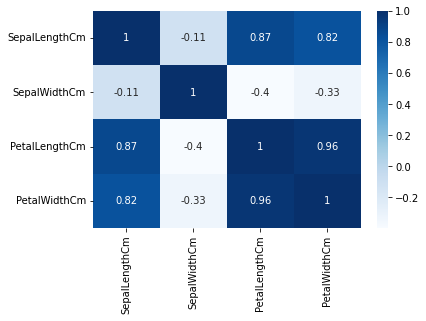

In [59]:
corr= iris.corr()
sb.heatmap(corr,cmap="Blues",vmax=1,annot_kws={'size':10},annot=True)
plt.show()


### Creating KNN Model

In [63]:
x= iris.iloc[:,-2:].values

In [64]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans= KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)


### Creating Elbow Graph

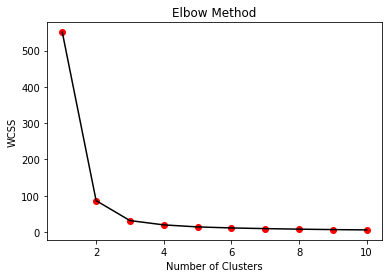

In [66]:
k= range(1,11)
plt.scatter(k,wcss,c='red')
plt.plot(k,wcss,c='black')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [67]:
kmeanc= KMeans(n_clusters=3, init='k-means++',random_state=42)
ypred=kmeanc.fit_predict(x)
print(ypred)


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0
 0 0]


### Cluster Visualisation

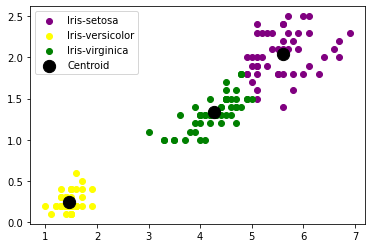

In [69]:
plt.scatter(x[ypred==0,0],x[ypred==0,1],c='purple',label='Iris-setosa')
plt.scatter(x[ypred==1,0],x[ypred==1,1],c='yellow',label='Iris-versicolor')
plt.scatter(x[ypred==2,0],x[ypred==2,1],c='green',label='Iris-virginica')

plt.scatter(kmeanc.cluster_centers_[:,0],kmeanc.cluster_centers_[:,1],s=150,c='black',label='Centroid')
plt.legend()


### The above plot shows that the optimum number of clusters in Iris dataset is 3